In [152]:
import scipy.spatial
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import OrderedDict

# 1 Maillage de Delaunay

In [17]:
coords = np.random.rand(10, 2)

In [18]:
coords
X = [x[0] for x in coords]
Y = [y[1] for y in coords]
tri = scipy.spatial.Delaunay(coords)

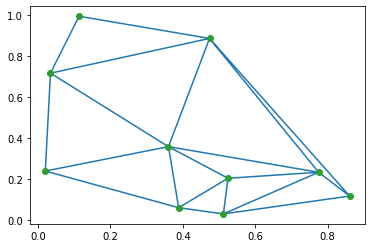

In [19]:
plt.triplot(coords[:,0], coords[:,1], tri.simplices.copy())
plt.plot(coords[:,0], coords[:,1], 'o')
plt.show()

# 2 Projeter des points sur une isovaleur de f

In [78]:
def Newton(func, x0, lamda0):
#     vect = np.array([random.random(), random.random()])
#     lamda = random.random()
    lamda_list = [lamda0]
    lamda = lamda0
    x = x0
    while np.abs(g(func, lamda, x0)) > 10 ** (- 4):
        lamda = lamda - g(func, lamda, x0)/gprime(func, lamda, x0)
        x = x0 + lamda * grad_func(func, x0)
        lamda_list.append(lamda)
        
    plt.plot(np.arange(len(lamda_list)), lamda_list)
    return lamda


def grad_func(func, vect):
    eps = 10 ** (-5)
    x = vect[0]
    y = vect[1]
    
    res_x = ( func(vect + np.array(eps * np.array([1, 0]))) - func(vect) ) / eps
    res_y = ( func(vect + np.array(eps * np.array([0, 1]))) - func(vect) ) / eps
    
    return np.array([res_x, res_y])

def g(func, lamda, x0):
    return func(x0 + lamda * grad_func(func, x0))

def gprime(func, lamda, x0):
    return np.dot(grad_func(func, x0), grad_func(func, x0 + lamda * grad_func(func, x0)))

In [131]:
def f(arr):
    return arr[1]**2 + arr[0]**2 -2

1.4904041475013616

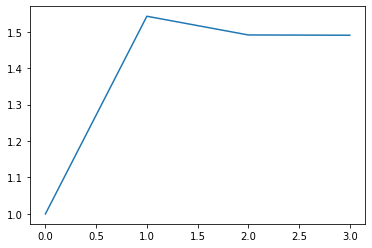

In [85]:
Newton(f, np.array([1,2]), 1)

In [77]:
g(f, -0.16666611105222257, np.array([1,2]) )

9.53644496703987e-10

# 3 Maillage de la boite englobante

In [97]:
def meshB(xB, yB, h):
    L = int((xB[1] - xB[0])/h)
    H = int((yB[1] - yB[0])/h)
    points = []
    
    for j in range (H+1):
        if (j%2 == 0):
            for i in range(L+1):
                points.append([xB[0] + i*h, yB[0] + j*np.sqrt(3) *h/2])
        else:
            for i in range(L):
                points.append([xB[0] + i*h + h /2, yB[0] + j*np.sqrt(3) * h /2])
                
    return points

In [98]:
meshB((0,1), (0,1), 0.5)

[[0.0, 0.0],
 [0.5, 0.0],
 [1.0, 0.0],
 [0.25, 0.4330127018922193],
 [0.75, 0.4330127018922193],
 [0.0, 0.8660254037844386],
 [0.5, 0.8660254037844386],
 [1.0, 0.8660254037844386]]

# 4 Un premier maillage de Omega

In [134]:
def question4(func, xB, yB, h):
    coords = prepare_points_q4(func, xB, yB, h)
    tri = scipy.spatial.Delaunay(coords)
    plt.triplot(coords[:,0], coords[:,1], tri.simplices.copy())
    plt.plot(coords[:,0], coords[:,1], 'o')
    plt.show()
    
def prepare_points_q4(func, xB, yB, h):
    maillage = meshB(xB, yB, h)
    coords = []
    for i in range (len(maillage)):
        if (func(maillage[i]) < 0):
            coords.append(maillage[i])
    coords = np.array(coords)
    return coords

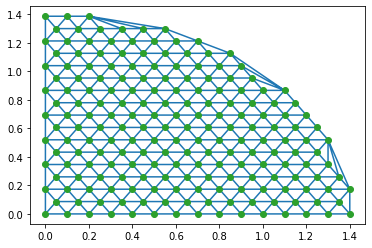

In [135]:
question4(f, (0,3), (0,3), 0.1)

# 5 Les aretes du maillage 

In [164]:
def edge(func, xB, yB, h):
    coords = prepare_points_q4(func, xB, yB, h)
    tri = scipy.spatial.Delaunay(coords)
    sommets = tri.simplices
    
    aretes = []
    
    for triangle in sommets:
        aretes.append(aretes_triangle(triangle))
        
    flat_list = []
    for sublist in aretes:
        for item in sublist:
            flat_list.append(item)
            
    return remove_duplicates(flat_list)

def aretes_triangle(triangle):
    arete1 = [min(triangle[0], triangle[1]), max(triangle[0], triangle[1])]
    arete2 = [min(triangle[0], triangle[2]), max(triangle[0], triangle[2])]
    arete3 = [min(triangle[1], triangle[2]), max(triangle[1], triangle[2])]
    
    return arete1, arete2, arete3

def remove_duplicates(l):
    L = []
    for i in l:
        if (i not in L):
            L.append(i)
            
    return L


def vec(func, xB, yB, h):
    edges = edge(func, xB, yB, h)
    for edge in edges:
        vec.append()

In [167]:
edge(f, (0,3), (0,3), 0.1)

[[137, 149],
 [137, 159],
 [149, 159],
 [149, 160],
 [159, 160],
 [130, 143],
 [131, 143],
 [130, 131],
 [130, 142],
 [142, 143],
 [105, 106],
 [105, 119],
 [106, 119],
 [63, 76],
 [62, 63],
 [62, 76],
 [76, 77],
 [63, 77],
 [76, 90],
 [77, 90],
 [9, 10],
 [9, 24],
 [10, 24],
 [39, 54],
 [40, 54],
 [39, 40],
 [169, 178],
 [159, 169],
 [159, 178],
 [160, 169],
 [169, 170],
 [160, 170],
 [184, 185],
 [175, 185],
 [175, 184],
 [184, 191],
 [185, 191],
 [166, 176],
 [166, 175],
 [175, 176],
 [176, 185],
 [177, 185],
 [176, 177],
 [165, 166],
 [155, 166],
 [155, 165],
 [165, 175],
 [29, 44],
 [29, 58],
 [44, 58],
 [58, 59],
 [44, 59],
 [15, 29],
 [0, 15],
 [0, 29],
 [5, 6],
 [5, 20],
 [6, 20],
 [92, 106],
 [92, 105],
 [85, 99],
 [85, 112],
 [99, 112],
 [10, 25],
 [11, 25],
 [10, 11],
 [24, 25],
 [25, 39],
 [24, 39],
 [25, 40],
 [53, 54],
 [53, 68],
 [54, 68],
 [53, 67],
 [67, 68],
 [39, 53],
 [56, 57],
 [56, 71],
 [57, 71],
 [57, 98],
 [71, 98],
 [43, 98],
 [43, 57],
 [54, 69],
 [68, 69],
 